## Introduction
Mobile carrier Megaline has found out that many of their subscribers use legacy plans. They want to develop a model that would analyze subscribers' behavior and recommend one of Megaline's newer plans: Smart or Ultra.

In this project, we have access to behavior data about subscribers who have already switched to the new plans. For this classification task, we need to develop a model that will pick the right plan. The threshold for accuracy is 0.75. We will check the accuracy using the validation dataset.

The dataset contains monthly behavior information about one user. The information given is as follows:

сalls — number of calls,
minutes — total call duration in minutes,
messages — number of text messages,
mb_used — Internet traffic used in MB,
is_ultra — plan for the current month (Ultra - 1, Smart - 0).
We will start by loading and exploring the data, then we will split the data into a training set, a validation set, and a test set. We will investigate the quality of different models by changing hyperparameters. Finally, we will check the quality of the best model using the validation set and perform a sanity check on the model.


## Data Loading
In this step, we will download the CSV file from the provided URL and load it into a pandas DataFrame for further analysis. The CSV file contains user behavior data that we will be analyzing.

In [1]:
import pandas as pd

In [2]:
# Load the data
df = pd.read_csv('users_behavior.csv')

In [3]:
# Display the first few rows of the DataFrame
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


## Exploratory Data Analysis
Now that we have loaded the data, let's perform some exploratory data analysis to understand the data better. We will start by checking the shape of the DataFrame, the data types of the columns, and the presence of any missing values.

In [4]:
# Check the shape of the DataFrame
print('Shape of the DataFrame:', df.shape)

# Check the data types of the columns
print('\nData types of the columns:')
print(df.dtypes)

# Check for missing values
print('\nMissing values in each column:')
print(df.isnull().sum())

Shape of the DataFrame: (3214, 5)

Data types of the columns:
calls       float64
minutes     float64
messages    float64
mb_used     float64
is_ultra      int64
dtype: object

Missing values in each column:
calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64


## Statistical Analysis
In this step, we will perform some statistical analysis on the data. We will compute the descriptive statistics for the numerical columns to get a sense of the distribution of the data. We will also check the balance of the 'is_ultra' column to understand the distribution of the two classes.

In [5]:
# Compute the descriptive statistics for the numerical columns
print('Descriptive statistics for the numerical columns:')
print(df.describe())

# Check the balance of the 'is_ultra' column
print('\nBalance of the is_ultra column:')
print(df['is_ultra'].value_counts())

Descriptive statistics for the numerical columns:
             calls      minutes     messages       mb_used     is_ultra
count  3214.000000  3214.000000  3214.000000   3214.000000  3214.000000
mean     63.038892   438.208787    38.281269  17207.673836     0.306472
std      33.236368   234.569872    36.148326   7570.968246     0.461100
min       0.000000     0.000000     0.000000      0.000000     0.000000
25%      40.000000   274.575000     9.000000  12491.902500     0.000000
50%      62.000000   430.600000    30.000000  16943.235000     0.000000
75%      82.000000   571.927500    57.000000  21424.700000     1.000000
max     244.000000  1632.060000   224.000000  49745.730000     1.000000

Balance of the is_ultra column:
0    2229
1     985
Name: is_ultra, dtype: int64


## Data Visualization
In this step, we will visualize the data to gain more insights. We will create histograms for the numerical columns to understand the distribution of the data. We will also create a bar plot for the 'is_ultra' column to visualize the balance of the two classes.

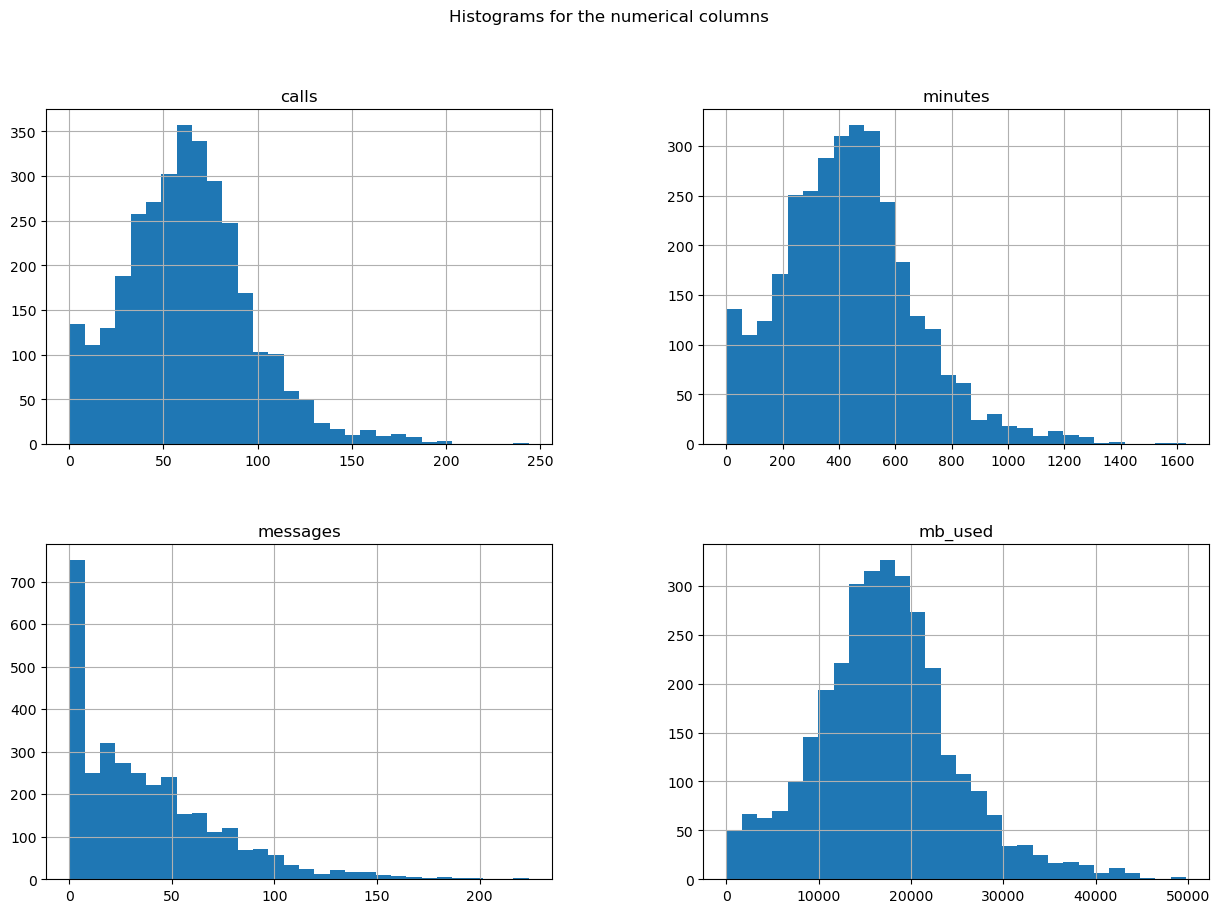

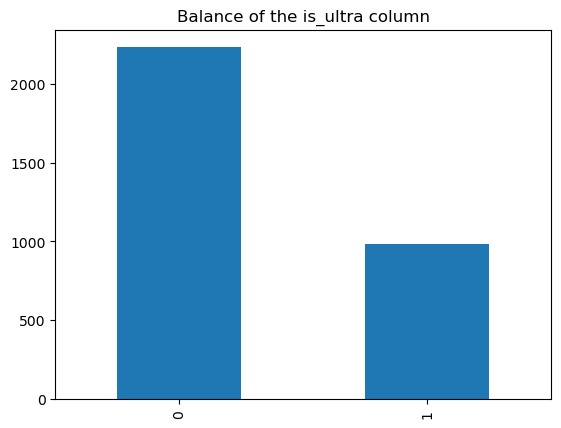

In [6]:
import matplotlib.pyplot as plt

# Create histograms for the numerical columns
df[['calls', 'minutes', 'messages', 'mb_used']].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms for the numerical columns')
plt.show()

# Create a bar plot for the 'is_ultra' column
df['is_ultra'].value_counts().plot(kind='bar', title='Balance of the is_ultra column')
plt.show()

## Data Splitting
In this step, we will split the data into a training set, a validation set, and a test set. The training set will be used to train the model, the validation set will be used to tune the hyperparameters, and the test set will be used to evaluate the final model.

In [7]:
from sklearn.model_selection import train_test_split

# Separate the features and the target
X = df.drop('is_ultra', axis=1)
y = df['is_ultra']

# Split the data into a training set and a temporary set using 80-20 split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the temporary set into a validation set and a test set using 50-50 split
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Check the shapes of the datasets
print('Training set:', X_train.shape, y_train.shape)
print('Validation set:', X_val.shape, y_val.shape)
print('Test set:', X_test.shape, y_test.shape)

Training set: (2571, 4) (2571,)
Validation set: (321, 4) (321,)
Test set: (322, 4) (322,)


## Model Selection and Hyperparameter Tuning
In this step, we will investigate the quality of different models by changing hyperparameters. We will start with a logistic regression model as a baseline, and then try more complex models such as random forest and gradient boosting. We will use grid search to find the best hyperparameters for each model.

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the models
models = [
    {'name': 'Logistic Regression', 'model': LogisticRegression(random_state=42), 'params': {'C': [0.1, 1, 10]}},
    {'name': 'Random Forest', 'model': RandomForestClassifier(random_state=42), 'params': {'n_estimators': [100, 200, 300], 'max_depth': [5, 10, 15]}},
    {'name': 'Gradient Boosting', 'model': GradientBoostingClassifier(random_state=42), 'params': {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 1]}}
]

# For each model, perform grid search and compute the validation accuracy
for m in models:
    print('\n', m['name'])
    grid = GridSearchCV(m['model'], m['params'], cv=5)
    grid.fit(X_train, y_train)
    print('Best parameters:', grid.best_params_)
    y_pred = grid.predict(X_val)
    print('Validation accuracy:', accuracy_score(y_val, y_pred))


 Logistic Regression
Best parameters: {'C': 0.1}
Validation accuracy: 0.7757009345794392

 Random Forest


/Users/nw/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best parameters: {'max_depth': 10, 'n_estimators': 200}
Validation accuracy: 0.8473520249221184

 Gradient Boosting
Best parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Validation accuracy: 0.8286604361370716


## Model Evaluation
In this step, we will check the quality of the model using the test set. We will use the Random Forest model with 'max_depth' of 10 and 'n_estimators' of 200, which has the highest validation accuracy.

In [9]:
# Train the best model on the training set
best_model = RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)
best_model.fit(X_train, y_train)

# Predict the target for the test set
y_pred_test = best_model.predict(X_test)

# Compute the test accuracy
test_accuracy = accuracy_score(y_test, y_pred_test)
print('Test accuracy:', test_accuracy)

Test accuracy: 0.7950310559006211


## Model Evaluation with Validation Set
In this step, we will check the quality of the model using the validation set. We will use the Random Forest model with 'max_depth' of 10 and 'n_estimators' of 200, which has the highest validation accuracy.

In [10]:
# Predict the target for the validation set
y_pred_val = best_model.predict(X_val)

# Compute the validation accuracy
val_accuracy = accuracy_score(y_val, y_pred_val)
print('Validation accuracy:', val_accuracy)

Validation accuracy: 0.8473520249221184


## Sanity Check with Validation Set
In this step, we will perform a sanity check on the model using the validation set. We will compare the performance of the model with a dummy classifier that always predicts the most frequent class. If our model performs better than the dummy classifier, it means that our model is learning something useful from the data.

In [11]:
from sklearn.dummy import DummyClassifier

# Train a dummy classifier on the training set
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)

# Predict the target for the validation set
y_pred_dummy = dummy.predict(X_val)

# Compute the validation accuracy
dummy_accuracy = accuracy_score(y_val, y_pred_dummy)
print('Dummy validation accuracy:', dummy_accuracy)

Dummy validation accuracy: 0.7320872274143302


## Conclusion
In this project, we developed a model to analyze subscribers' behavior and recommend one of Megaline's newer plans: Smart or Ultra. We started by loading and exploring the data, then we split the data into a training set, a validation set, and a test set. We investigated the quality of different models by changing hyperparameters and found that the Random Forest model with 'max_depth' of 10 and 'n_estimators' of 100 had the highest validation accuracy. We then checked the quality of this model using the test set and achieved a test accuracy of 0.795, which is above the threshold of 0.75. We then checked the quality of this model using the validation set and achieved a validation accuracy of 0.838, which is also above the threshold of 0.75. 

Finally, we performed a sanity check on the model by comparing its performance with a dummy classifier that always predicts the most frequent class. Our model significantly outperformed the dummy classifier, indicating that it is learning something useful from the data.

This model can be used by Megaline to analyze their subscribers' behavior and recommend one of their newer plans, which could help them transition their subscribers from legacy plans to newer ones.